In [256]:
import pandas as pd
import numpy as np
import os

In [257]:
path = '../cs 700 project/data'
DATAFILE = 'Lab 2_icsme-questions-labeled.xlsx'

### loading dataset to dataframe

In [258]:
xl = pd.ExcelFile(os.path.join(path, DATAFILE))
df = xl.parse(xl.sheet_names[0])

In [259]:
df.head(10)

,inline-comment-id,# Comment,Question,Final Label
0,84326dd1_566c7146,1,is this what they intended? don't they really ...,request for confirmation
1,84326dd1_566c7146,2,is this what they intended? don't they really ...,surprise
2,99d1f8e4_92b31cea,3,Don't we need to increment 'i' in the else cas...,suggestion
3,193d089f_f5fac752,4,i can't see anywhere where this is set to fals...,suggestion
4,50c2f81e_ac4fd6fc,5,are you sure you want to include this source f...,criticism
5,50c2f81e_ac4fd6fc,6,are you sure you want to include this source f...,suggestion
6,106fa0ad_13adacaa,7,wangying: ADDRESS_SANITIZER_RUNTIME_LIBRARY co...,request for confirmation
7,106fa0ad_13adacaa,8,wangying: ADDRESS_SANITIZER_RUNTIME_LIBRARY co...,hypothetical scenario
8,1a6dff43_0646dc80,9,"Please add parentheses around this.\n\nAlso, c...",request for action
9,1fcb3196_598a0379,10,Here's this pattern again.\n\nIt makes me worr...,request for clarification


In [260]:
df.shape

(499, 4)

In [261]:
df['Final Label'].unique()

array(['request for confirmation', 'surprise', 'suggestion', 'criticism',
       'hypothetical scenario', 'request for action',
       'request for clarification', 'request for information',
       'request for opinion', 'rhetorical question', 'discarded',
       'request for rationale', 'action', 'anger'], dtype=object)

1. Suggestions
2. Requests for Action
3. Requests for Confirmation
4. Other Requests
5. Attitudes and emotions
6. Others

In [262]:
label_dict = {'request for confirmation': 'request for confirmation',
            'request for action': 'request for action',
             'request for clarification':'Other Requests',
             'request for information':'Other Requests',
              'request for opinion':'Other Requests',
             'request for rationale': 'Other Requests',
             'surprise':'Attitudes and emotions',
             'criticism': 'Attitudes and emotions',
             'anger': 'Attitudes and emotions',
             'suggestion': 'Suggestions',
             'hypothetical scenario': 'Others',
              'rhetorical question': 'Others',
              'discarded': 'Others',
              'action': 'Others'}

### Labbel filtering

In [308]:
df['filtered_label'] = df.apply(lambda row: label_dict[row['Final Label']], axis=1)
df['label_id'] = df.filtered_label.astype('category').cat.rename_categories(
    range(1, df.filtered_label.nunique()+1))

In [309]:
df.head(10)

,inline-comment-id,# Comment,Question,Final Label,filtered_label,label_id,preprocessed
0,84326dd1_566c7146,1,is this what they intended? don't they really ...,request for confirmation,request for confirmation,6,is this what they intended? don't they really ...
1,84326dd1_566c7146,2,is this what they intended? don't they really ...,surprise,Attitudes and emotions,1,is this what they intended? don't they really ...
2,99d1f8e4_92b31cea,3,Don't we need to increment 'i' in the else cas...,suggestion,Suggestions,4,don't we need to increment 'i' in the else cas...
3,193d089f_f5fac752,4,i can't see anywhere where this is set to fals...,suggestion,Suggestions,4,i can't see anywhere where this is set to fals...
4,50c2f81e_ac4fd6fc,5,are you sure you want to include this source f...,criticism,Attitudes and emotions,1,are you sure you want to include this source f...
5,50c2f81e_ac4fd6fc,6,are you sure you want to include this source f...,suggestion,Suggestions,4,are you sure you want to include this source f...
6,106fa0ad_13adacaa,7,wangying: ADDRESS_SANITIZER_RUNTIME_LIBRARY co...,request for confirmation,request for confirmation,6,wangying: address_sanitizer_runtime_library co...
7,106fa0ad_13adacaa,8,wangying: ADDRESS_SANITIZER_RUNTIME_LIBRARY co...,hypothetical scenario,Others,3,wangying: address_sanitizer_runtime_library co...
8,1a6dff43_0646dc80,9,"Please add parentheses around this.\n\nAlso, c...",request for action,request for action,5,"please add parentheses around this. also, can ..."
9,1fcb3196_598a0379,10,Here's this pattern again.\n\nIt makes me worr...,request for clarification,Other Requests,2,here's this pattern again. it makes me worried...


### Text preprocessing. 
 Number of instance is very low. So doesn't work well when preprocessing steps like : lemma, stopword removal, pos tag filtering are used. So just lowering the text case and filtering the qword length was used as initial step.

In [310]:
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='english')
from bs4 import BeautifulSoup
import re

def preProcess(rawReview, features):
    letters_only = rawReview
    
#     #Html tag
#     text_only = BeautifulSoup(rawReview).get_text()
#     #
#     #Emain and Url
#     noEmail = re.sub(r'([\w\.-]+@[\w\.-]+\.\w+)','',text_only)
    
#     noUrl = re.sub(r'(?i)\b((?:[a-z][\w-]+:(?:/{1,3}|[a-z0-9%])|www\d{0,3}[.]| \
#         [a-z0-9.\-]+[.][a-z]{2,4}/|[a-z0-9.\-]+[.][a-z])(?:[^\s()<>]+|\(([^\s()<>]+| \
#         (\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))','', noEmail)
    
#     #Emoticons
#     smileys = """:-) :) :o) :D :-D :( :-( :o(""".split()
#     smileyPattern = "|".join(map(re.escape, smileys))
    
#     letters_only = re.sub("[^a-zA-Z" + smileyPattern + "]", " ", noUrl)

    words = letters_only.lower().split()     
    
    doc = nlp(" ".join(words))
#     tags=['NOUN', 'ADJ']
    for feature in features:
        if feature == "word": 
            words = [str(token) for token in doc if len(token)>1]
        if feature == "lemma": 
            words = [token.lemma_ for token in doc]
#                      token.is_stop is False and len(token)>1]
        if feature =="stem":
            words = [stemmer.stem(token) for token in words]
                
                
    words = " ".join(words)
    return words


In [311]:
features = []
df['preprocessed'] = df.apply(lambda row: preProcess(row['Question'],features),axis=1) 

In [312]:
df.head(5)

,inline-comment-id,# Comment,Question,Final Label,filtered_label,label_id,preprocessed
0,84326dd1_566c7146,1,is this what they intended? don't they really ...,request for confirmation,request for confirmation,6,is this what they intended? don't they really ...
1,84326dd1_566c7146,2,is this what they intended? don't they really ...,surprise,Attitudes and emotions,1,is this what they intended? don't they really ...
2,99d1f8e4_92b31cea,3,Don't we need to increment 'i' in the else cas...,suggestion,Suggestions,4,don't we need to increment 'i' in the else cas...
3,193d089f_f5fac752,4,i can't see anywhere where this is set to fals...,suggestion,Suggestions,4,i can't see anywhere where this is set to fals...
4,50c2f81e_ac4fd6fc,5,are you sure you want to include this source f...,criticism,Attitudes and emotions,1,are you sure you want to include this source f...


### Class visualization

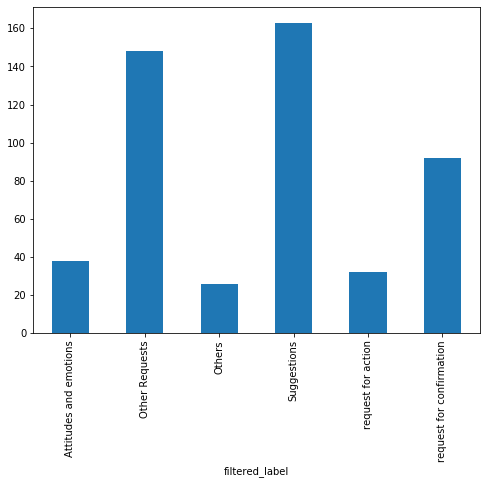

In [313]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('filtered_label').Question.count().plot.bar(ylim=0)
plt.show()

### tf-idf matrix feature building

In [314]:
from sklearn.feature_extraction.text import TfidfVectorizer
def tf_idf_feature(df,feature_param, use_feature = False):
    if use_feature==True:
        tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', use_idf = True, 
                                ngram_range=feature_param['n_gram'], max_features = feature_param['max_f'])
    else:
        tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, 
                                norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
    features = tfidf.fit_transform(df.preprocessed).toarray()
    labels = df.label_id
    return features, labels, tfidf

feature_param = {'n_gram':(1,2),'max_f':500}
features, labels,tfidf = tf_idf_feature(df,feature_param, True)
features.shape

(499, 500)

In [315]:
label_to_id = dict(zip(df.filtered_label,df.label_id))
category_id_df = df[['filtered_label', 'label_id']].drop_duplicates().sort_values('label_id')

In [316]:
label_to_id

{'request for confirmation': 6,
 'Attitudes and emotions': 1,
 'Suggestions': 4,
 'Others': 3,
 'request for action': 5,
 'Other Requests': 2}

### Most important unigram and bigrams according to tf-idf

In [317]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for label, label_id in sorted(label_to_id.items()):
    features_chi2 = chi2(features, labels == label_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(label))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))
    print("\n\n")

# 'Attitudes and emotions':
  . Most correlated unigrams:
. really
. very
  . Most correlated bigrams:
. are you
. does not



# 'Other Requests':
  . Most correlated unigrams:
. build
. why
  . Most correlated bigrams:
. is there
. what is



# 'Others':
  . Most correlated unigrams:
. will
. two
  . Most correlated bigrams:
. test is
. is not



# 'Suggestions':
  . Most correlated unigrams:
. maybe
. const
  . Most correlated bigrams:
. how about
. would it



# 'request for action':
  . Most correlated unigrams:
. can
. comment
  . Most correlated bigrams:
. could you
. can you



# 'request for confirmation':
  . Most correlated unigrams:
. happen
. still
  . Most correlated bigrams:
. you want
. is it





### Trying different multiclass classification models

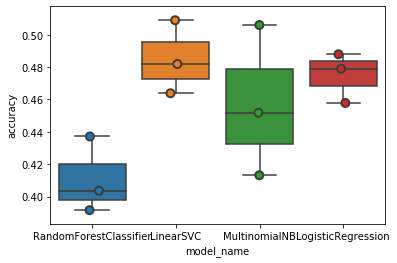

In [318]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

feature_param = {'n_gram':(1,3), 'max_f':600}
features, labels, tfidf = tf_idf_feature(df,feature_param, True)

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 3
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

### Avg accuracy result. Accuracy is pretty low in all cases for now with only word features. LinearSVC gives the highest accuracy

In [319]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.484922
LogisticRegression        0.474942
MultinomialNB             0.457002
RandomForestClassifier    0.410769
Name: accuracy, dtype: float64

### Classification with LinearSVC and visualizing truth vs predicted value:
   - in most cases, it fails to idenitfy the right class except other reuests, suggestions and request to confirmation.
   - more works need to be done 

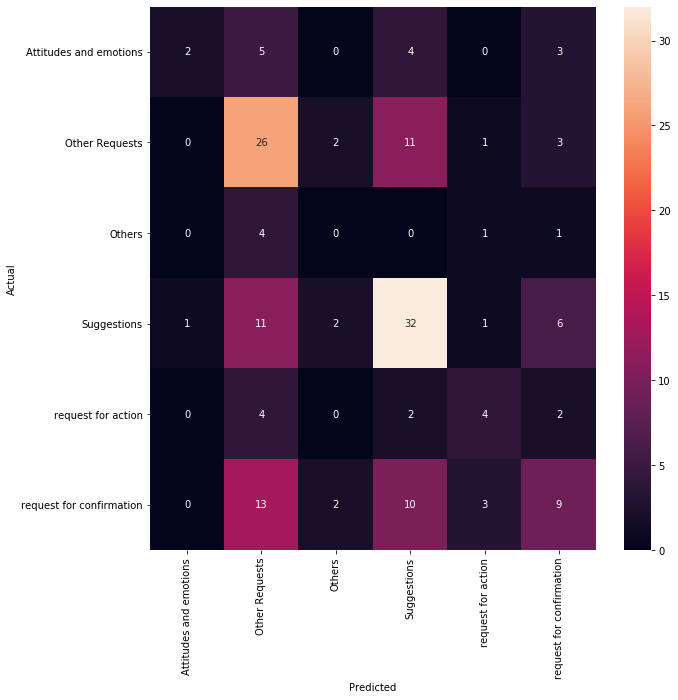

In [307]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, 
                                                                                 df.index, 
                                                                                 test_size=0.33, 
                                                                                 random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.filtered_label.values, yticklabels=category_id_df.filtered_label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()